In [139]:
import numpy as np
import matplotlib.pyplot as plt

# Definir las constantes
g = 9.8 # gravedad [m/s^2]
p_atm = 101325 # Presión atmosférica [Pa]
beta = 3.67e-3 # Coeficiente de expansion termica [1/K]
T_w = 80.0 + 273.0 # Temperatura de la pared [K]
T_a = 20.0 + 273.0 # Temperatura ambiente [K]
delta_T = T_w - T_a
T_f = (0.92 * T_a + 0.08 * T_w) 
lambda_f = 0.04 # Coeficiente de friccion [adimensional]
R = 10.0 # Radio de la tuberia [m]
L = 100.0 # Longitud de la tuberia [m]
alpha = 2.2e-5 # Coeficiente de difusividad [m^2/s]
rho_0 = 1.0 # Densidad [kg/m^3]
Cp = 1.012 # Capacidad calorifica [J/(kg K)]
k = 0.024 # Conductividad termica [W/(m K)]
nu = 1.71e-5 # Viscosidad [Pa s]
Ra_D = (g * beta * delta_T * (2 * R)**3)/ nu**2 # Numero de Rayleigh
Nu = (576/(Ra_D * 2 * R /L)**2 + 2.873/(Ra_D * 2 * R /L)**(1/2))**(-1/2)# Numero de Nusselt
h_v = (k * Nu)/ (2 * R * L) # coeficiente de tranferencia de calor por convección [W/(m^3 K)]
theta_r = (T_w - T_a)/(T_f - T_a)
LAMBDA = (lambda_f * L) / (8 * R)
u_c = (rho_0 * g * Cp * beta * (T_f - T_a))/(h_v * (1/2 + (lambda_f * L)/ (8 *R))) #  = u_e velocidad en el estado estacionario y se usa como velocidad caracteristica [m/s]
Pi_0 = (rho_0 * g * L) / p_atm 
Pi_d = (rho_0 * u_c**2) / p_atm
gamma = (h_v * L) / (rho_0 * Cp * u_c)
delta = alpha / (L * u_c)
t_c = L/ u_c # tiempo caracteristico [s]
phi = (L * g * beta) * (T_f - T_a) / u_c**2



In [140]:
print('T_f = ' + str(T_f))
print('h_v = ' + str(h_v))
print('Lambda = ' + str(LAMBDA))
print('u_e = ' + str(u_c))
print('Pi_0 = ' + str(Pi_0))
print('Pi_d = ' + str(Pi_d))
print('gamma = ' + str(gamma))
print('delta = ' + str(delta))
print('t_c = ' + str(t_c))
print('phi = ' + str(phi))
print('theta_r = ' + str(theta_r))

T_f = 297.8
h_v = 0.013123697793705775
Lambda = 0.05
u_e = 24.20443666055377
Pi_0 = 0.009671848013816927
Pi_d = 0.0057819368769282935
gamma = 0.05357728835290001
delta = 9.089242732037485e-09
t_c = 4.131473969107947
phi = 0.029467508594095016
theta_r = 12.49999999999997


In [141]:
# Definición de variables y condiciones iniciales
N = 25 # Número de puntos en la dirección temporal
M = 50 # Número de puntos en la dirección vertical
eta = np.linspace(0, 1, M)  # Coordenada vertical adimensional
tau = np.linspace(0, 1, N)  # Coordenada temporal adimensional
deta = (eta[-1] - eta[0]) / M
dtau = (tau[-1] - tau[0]) / N
dtau_eta = dtau / deta
dtau_eta2 = dtau /deta**2
v = np.zeros(N)  # Velocidad adimensional
theta = np.zeros((N, M))  # Temperatura adimensional
Pi = np.zeros((N, M))  # Presión adimensional

# Condiciones iniciales
v[0] = 0.0  # Velocidad inicial cero
theta[0, :] = 0.0  # Temperatura inicial uniforme
Pi[0, :] = 1.0  # Presión inicial uniforme

# Simulación numérica
for i in range(N-1):
    for j in range(M-1):

         v[i+1] = v[i] + dtau_eta * ((-1/Pi_d) * ((Pi[i, j+1] - Pi[i, j])) 
                                              - phi * (theta[i, j] - theta_r) * (deta)
                                              - LAMBDA * v[i]**2) * (deta)
         
         theta[i+1, j] = theta[i, j] + dtau_eta2 * (- v[i+1] * ((theta[i, j+1] - theta[i, j]) * deta)
                                                              + delta * ((theta[i, j-1] - 2 * theta[i, j] + theta[i, j+1]))
                                                              - gamma * (theta[i, j] - theta_r) * deta**2)
         
         Pi[i+1, j] = 1 - 0.5 * Pi_d * v[i+1]**2 + Pi_0 * eta[j]



/var/folders/lx/vhxvbgp94fj63r8wrldf_13m0000gn/T/ipykernel_2738/4015600965.py:31: RuntimeWarning: overflow encountered in scalar power
  Pi[i+1, j] = 1 - 0.5 * Pi_d * v[i+1]**2 + Pi_0 * eta[j]
/var/folders/lx/vhxvbgp94fj63r8wrldf_13m0000gn/T/ipykernel_2738/4015600965.py:27: RuntimeWarning: overflow encountered in scalar multiply
  theta[i+1, j] = theta[i, j] + dtau_eta2 * (- v[i+1] * ((theta[i, j+1] - theta[i, j]) * deta)
/var/folders/lx/vhxvbgp94fj63r8wrldf_13m0000gn/T/ipykernel_2738/4015600965.py:23: RuntimeWarning: invalid value encountered in scalar subtract
  v[i+1] = v[i] + dtau_eta * ((-1/Pi_d) * ((Pi[i, j+1] - Pi[i, j]))
/var/folders/lx/vhxvbgp94fj63r8wrldf_13m0000gn/T/ipykernel_2738/4015600965.py:25: RuntimeWarning: overflow encountered in scalar power
  - LAMBDA * v[i]**2) * (deta)
/var/folders/lx/vhxvbgp94fj63r8wrldf_13m0000gn/T/ipykernel_2738/4015600965.py:27: RuntimeWarning: invalid value encountered in scalar subtract
  theta[i+1, j] = theta[i, j] + dtau_eta2 * (- v[i+1] 

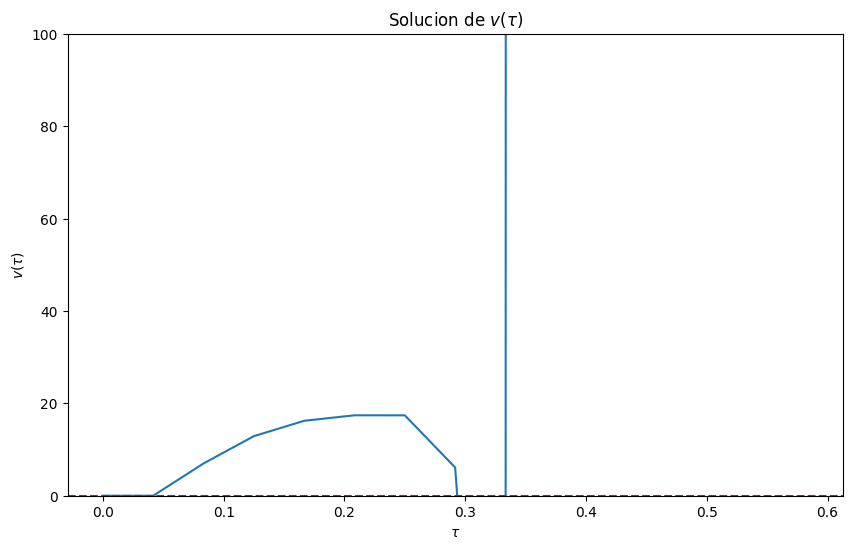

In [142]:
# Graficar la solucion de v(t)
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(tau, v, label = r'$v(\tau)$')

# Agregar una linea horizontal en un valor especifico de x
x_linea = 0.01  # Valor de x donde se dibujará la linea horizontal
ax.axhline(y=0.01, color='r', linestyle='--', label = r'$v_0$')

ax.set_xlabel(r'$\tau$')
ax.set_ylabel(r'$v(\tau)$')
ax.set_title('Solucion de '+r'$v(\tau)$')
ax.set_ylim(0,100)
#ax.legend()
plt.show()


In [143]:
v

array([ 0.00000000e+000,  2.94675086e-004,  6.98423094e+000,
        1.28950092e+001,  1.62204876e+001,  1.74070781e+001,
        1.74006456e+001,  6.11623543e+000, -1.41288927e+002,
        4.26676704e+004,  3.65003264e+009,  2.66444446e+019,
        1.41985346e+039,  4.03196767e+078,  3.25135266e+157,
                    nan,              nan,              nan,
                    nan,              nan,              nan,
                    nan,              nan,              nan,
                    nan])

In [144]:
import numpy as np
import matplotlib.pyplot as plt
# Constantes
phi = 0.036608739000020846
Pi_0 = 0.009671848013816927
Pi_d = 0.0037461972810798536
delta = 1.129195275611716e-08
gamma = 0.06656134363640165
Lambda = 0.05
theta_r = 15.529281548829731

# Parámetros de la tubería
L = 100.0  # Longitud de la tubería [m]
R = 10.0   # Radio de la tubería [m]

# Discretización
M = 256 # Número de puntos en la dirección vertical
N = 512 # Número de puntos en la dirección temporal
eta = np.linspace(0, 1, M)  # Coordenada vertical adimensional
tau = np.linspace(0, 1, N)  # Coordenada temporal adimensional
dx = (eta[-1]-eta[0])/M  # Espaciado en eta
dt = (tau[-1]-tau[0])/N  # Paso de tiempo (s)

# Inicializar variables
v = np.zeros(N)  # Velocidad
theta = np.zeros((M, N))  # Temperatura
Pi = np.zeros((M, N))  # Presión

# Condiciones iniciales
v[0] = 0.0  # Velocidad inicial cero
theta[0, :] = 0.0  # Temperatura inicial uniforme
Pi[0, :] = 1.0  # Presión inicial uniforme
Pi[:,-1] = 1 # La presión en todos los instantes en la posición final será la misma (P_atm)

# Simulación numérica
for t in range(1, N-1):
    
    
    for x in range(M-1):
        
        # Ecuación de movimiento
        dPi_deta = (Pi[x+1, t] - Pi[x-1, t]) / (2 * dx)  # Aproximación de la derivada de presión
        dv_dt = - (1 / Pi_d) * dPi_deta - phi * (theta[x, t-1] - theta_r) - Lambda * v[t-1]**2
        v[t] = v[t-1] + dv_dt * dt
        
        # Ecuación de temperatura
        dtheta_deta = (theta[x+1, t-1] - theta[x-1, t-1]) / (2 * dx)  # Aproximación de la derivada de temperatura
        d2theta_deta2 = (theta[x+1, t-1] - 2 * theta[x, t-1] + theta[x-1, t-1]) / (dx**2)  # Aproximación de la segunda derivada
        dtheta_dt = (delta / (v[t] + 1e-10)) * d2theta_deta2 - gamma * (theta[x, t-1] - theta_r)  # Evitar división por cero
        theta[x, t] = theta[x, t-1] + dtheta_dt * dt

print(v)

/var/folders/lx/vhxvbgp94fj63r8wrldf_13m0000gn/T/ipykernel_2738/1015695955.py:39: RuntimeWarning: invalid value encountered in sqrt
  v[t] = np.sqrt(2 * (Pi[0, t-1] - 1) * Pi_d)
/var/folders/lx/vhxvbgp94fj63r8wrldf_13m0000gn/T/ipykernel_2738/1015695955.py:45: RuntimeWarning: overflow encountered in scalar power
  dv_dt = - (1 / Pi_d) * dPi_deta - phi * (theta[x, t-1] - theta_r) - Lambda * v[t-1]**2


[ 0.00000000e+000  1.11036605e-003 -6.67321186e+001 -1.33900228e+002
 -2.02384363e+002 -2.73117537e+002 -3.47135257e+002 -4.25636347e+002
 -5.10061598e+002 -6.02201355e+002 -7.04349280e+002 -8.19530548e+002
 -9.51852676e+002 -1.10706477e+003 -1.29348475e+003 -1.52360693e+003
 -1.81703724e+003 -2.20619472e+003 -2.74824975e+003 -3.55256859e+003
 -4.85179631e+003 -7.21735058e+003 -1.23710125e+004 -2.73832486e+004
 -1.00676769e+005 -1.09056888e+006 -1.17237167e+008 -1.34235878e+012
 -1.75969445e+020 -3.02394975e+036 -8.92995320e+068 -7.78750626e+133
 -5.92238806e+263             -inf             -inf             -inf
             -inf             -inf             -inf             -inf
             -inf             -inf             -inf             -inf
             -inf             -inf             -inf             -inf
             -inf             -inf             -inf             -inf
             -inf             -inf             -inf             -inf
             -inf             -inf

In [145]:
for i in range(N-1):
    print('i = ' + str(i) + ', max = ' + str(max(Pi[:,i])) + ', min = ' +str(min(Pi[:, i])))

i = 0, max = 1.0, min = 1.0
i = 1, max = 1.0, min = 0.0
i = 2, max = 1.0, min = 0.0
i = 3, max = 1.0, min = 0.0
i = 4, max = 1.0, min = 0.0
i = 5, max = 1.0, min = 0.0
i = 6, max = 1.0, min = 0.0
i = 7, max = 1.0, min = 0.0
i = 8, max = 1.0, min = 0.0
i = 9, max = 1.0, min = 0.0
i = 10, max = 1.0, min = 0.0
i = 11, max = 1.0, min = 0.0
i = 12, max = 1.0, min = 0.0
i = 13, max = 1.0, min = 0.0
i = 14, max = 1.0, min = 0.0
i = 15, max = 1.0, min = 0.0
i = 16, max = 1.0, min = 0.0
i = 17, max = 1.0, min = 0.0
i = 18, max = 1.0, min = 0.0
i = 19, max = 1.0, min = 0.0
i = 20, max = 1.0, min = 0.0
i = 21, max = 1.0, min = 0.0
i = 22, max = 1.0, min = 0.0
i = 23, max = 1.0, min = 0.0
i = 24, max = 1.0, min = 0.0
i = 25, max = 1.0, min = 0.0
i = 26, max = 1.0, min = 0.0
i = 27, max = 1.0, min = 0.0
i = 28, max = 1.0, min = 0.0
i = 29, max = 1.0, min = 0.0
i = 30, max = 1.0, min = 0.0
i = 31, max = 1.0, min = 0.0
i = 32, max = 1.0, min = 0.0
i = 33, max = 1.0, min = 0.0
i = 34, max = 1.0, min =

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


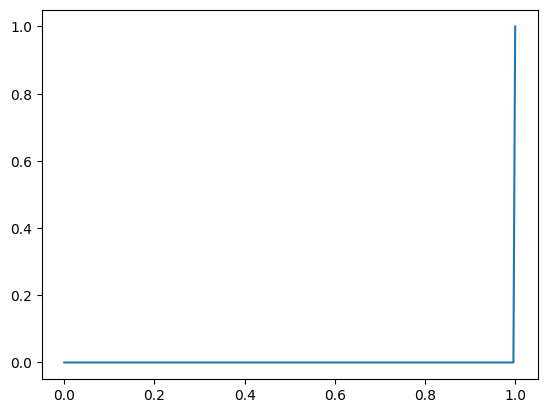

In [146]:
print(Pi[:, 1])
plt.plot(eta, Pi[:, 1])

In [147]:
print(M-1)
print(Pi[254, 1])
print(1- 0.5 * Pi_d * v[1]**2 - Pi_0 * eta[255])

255
0.0
0.9903281496768158


In [148]:
print(Pi_0)
print(v[1])

0.009671848013816927
0.0011103660450760685
